ValueError: Digital filter critical frequencies must be 0 < Wn < 1

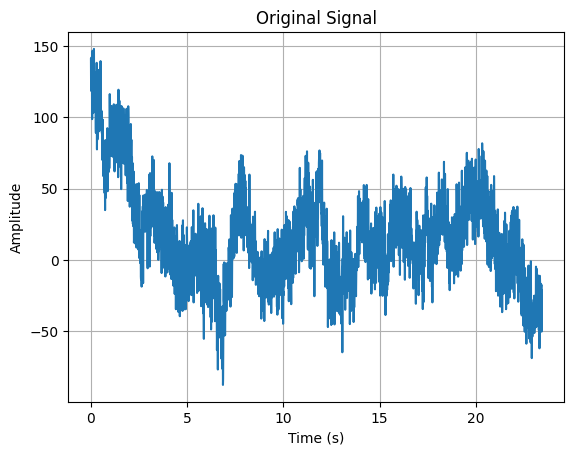

In [8]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# origin_raw_data_dir = "C:\\Users\\14870\\PycharmProjects\\Hands-on-EEG\\new_implement\\data\\origin_raw_data_slid_window_slice_3000"
df = pd.read_csv("C:\\Users\\a1882\Desktop\EEG\\new_implement\data\origin_raw_data_slid_window_slice_3000\lefthand_zyy_04_epocflex_2023_window_3.csv",header=None)
# 生成50Hz正弦波信号
fs = 128  # 采样率
t = np.arange(0, 3000/fs, 1/fs)
x = df.iloc[1,:]

# 绘制原始信号图像
plt.figure()
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)

# 设计低通滤波器，截止频率为Hz
fc = 64  # 截止频率
b, a = signal.butter(4, fc/(fs/2), 'lowpass')

# 使用低通滤波器滤波信号
y = signal.filtfilt(b, a, x)

# 绘制滤波后信号图像
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.grid(True)

plt.show()


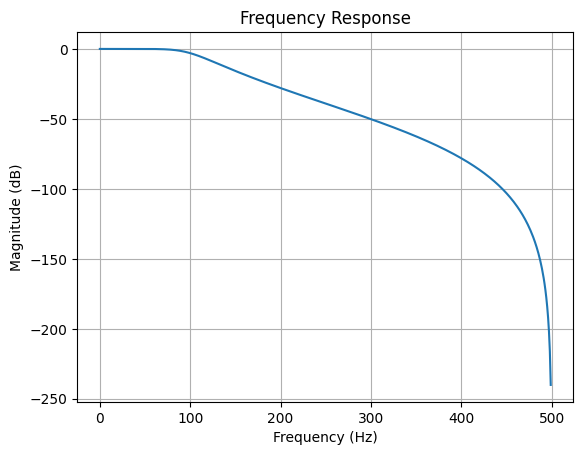

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 设计低通滤波器，截止频率为100Hz
fs = 1000  # 采样率
fc = 100  # 截止频率
b, a = signal.butter(4, fc/(fs/2), 'lowpass')

# 绘制滤波器频率响应曲线
w, h = signal.freqz(b, a)
freq = w / (2*np.pi) * fs  # 转换为频率

plt.figure()
plt.plot(freq, 20*np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response')
plt.grid(True)

plt.show()


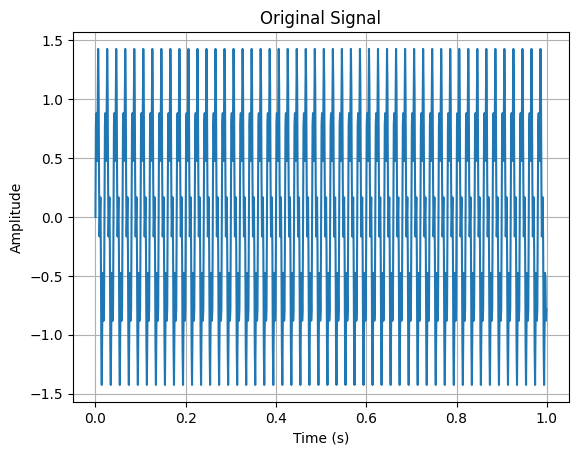

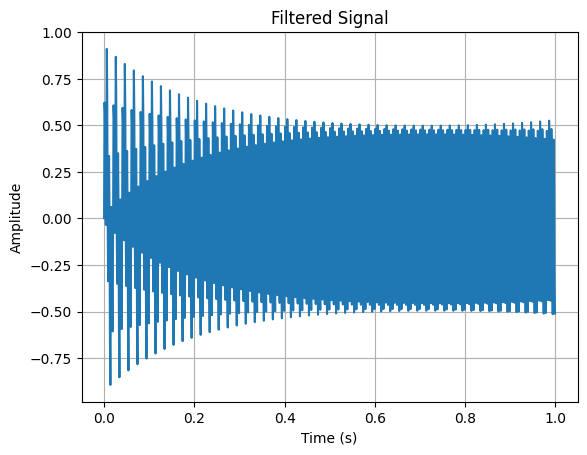

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 设计50Hz陷波器
fs = 1000  # 采样率
f0 = 50  # 陷波中心频率
Q = 30  # 质量因数
w0 = 2*np.pi*f0/fs
alpha = np.sin(w0)/(2*Q)
b = np.array([1, -2*np.cos(w0), 1])
a = np.array([1 + alpha, -2*np.cos(w0), 1 - alpha])

# 生成输入信号，包含50Hz正弦波和干扰信号
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*200*t)

# 使用陷波器滤波信号
y = signal.filtfilt(b, a, x)

# 绘制原始信号和滤波后信号图像
plt.figure()
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)

plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.grid(True)

plt.show()


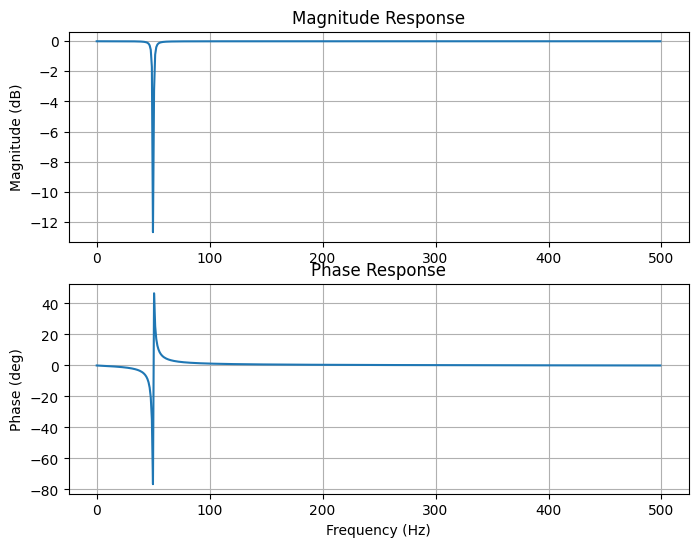

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 设计50Hz陷波器
fs = 1000  # 采样率
f0 = 50  # 陷波中心频率
Q = 30  # 质量因数
w0 = 2*np.pi*f0/fs
alpha = np.sin(w0)/(2*Q)
b = np.array([1, -2*np.cos(w0), 1])
a = np.array([1 + alpha, -2*np.cos(w0), 1 - alpha])

# 绘制陷波器频响曲线
w, h = signal.freqz(b, a)
f = w*fs/(2*np.pi)
mag = 20*np.log10(abs(h))
phase = np.angle(h, deg=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(f, mag)
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title('Magnitude Response')
ax1.grid(True)

ax2.plot(f, phase)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (deg)')
ax2.set_title('Phase Response')
ax2.grid(True)

plt.show()
